In [18]:
from rl_qoc import QuantumEnvironment, ChannelReward, QiskitConfig, QEnvConfig, ExecutionConfig, GateTarget, FidelityReward
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit.library import RXGate, UGate, RZXGate
from gymnasium.spaces import Box
import numpy as np
seed = 30980922
np.random.seed(seed)
params = ParameterVector("a", 1)
angle = np.random.uniform(-np.pi, np.pi, size=(1,))
angle = np.array([np.pi/2])
gate = RZXGate(*angle)
target = GateTarget(gate, (0,))
def apply_qc(qc:QuantumCircuit, params, qreg):
    qc.rzx(params[0], qreg[0], qreg[1])
    # qc.rx(params[0], qreg[0])

action_space = Box(-np.pi, np.pi, shape=(1,))
backend_config = QiskitConfig(apply_qc)
exec = ExecutionConfig(sampling_paulis=10000, n_shots=1, batch_size=1, n_reps=list(range(1, 10)),
                       dfe_precision=(0.01, 0.01), seed=seed,
                       c_factor=1)
channel = ChannelReward()
fidelity = FidelityReward()
channel_config = QEnvConfig(target, backend_config, action_space, reward=channel, execution_config=exec)

fidelity_config = QEnvConfig(target, backend_config, action_space, reward=fidelity,execution_config=exec)

fidelity_env = QuantumEnvironment(fidelity_config)
channel_env = QuantumEnvironment(channel_config)

In [19]:
print(gate.to_matrix())

[[ 0.70710678+0.j          0.        +0.j         -0.        -0.70710678j
   0.        +0.j        ]
 [ 0.        +0.j          0.70710678+0.j          0.        +0.j
   0.        +0.70710678j]
 [-0.        -0.70710678j  0.        +0.j          0.70710678+0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.70710678j  0.        +0.j
   0.70710678+0.j        ]]


In [20]:
angle


array([1.57079633])

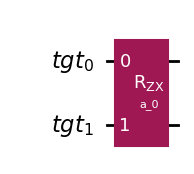

In [21]:
channel_env.circuit.draw("mpl")

In [22]:
data_no_dfe = channel.get_reward_data(channel_env.circuit, np.ones((1, 1)), channel_config)
channel.get_reward_with_primitive(data_no_dfe, channel_env.estimator)

DFE precision guarantee (0.01, 0.01)
Pauli sampling 1000000


array([0.77587848])

In [23]:
data_no_dfe[0].fiducials

(PauliList(['ZZ', 'ZI', 'IZ']),
 SparsePauliOp(['YI', 'YZ', 'IZ'],
               coeffs=[-0.01666583+0.j, -0.01666583+0.j,  0.01666583+0.j]))

In [24]:
data_no_dfe[1].fiducials

(PauliList(['ZZ', 'ZI', 'IZ']),
 SparsePauliOp(['YI', 'YZ', 'IZ'],
               coeffs=[0.01666583+0.j, 0.01666583+0.j, 0.01666583+0.j]))

In [25]:
data_no_dfe[1].pauli_eigenstate

'|01>'

In [26]:
print(data_no_dfe.fiducials)
data_no_dfe.pubs[0]

[(PauliList(['ZZ', 'ZI', 'IZ']), SparsePauliOp(['YI', 'YZ', 'IZ'],
              coeffs=[-0.01666583+0.j, -0.01666583+0.j,  0.01666583+0.j])), (PauliList(['ZZ', 'ZI', 'IZ']), SparsePauliOp(['YI', 'YZ', 'IZ'],
              coeffs=[0.01666583+0.j, 0.01666583+0.j, 0.01666583+0.j])), (PauliList(['ZZ', 'ZI', 'IZ']), SparsePauliOp(['YI', 'YZ', 'IZ'],
              coeffs=[ 0.01666583+0.j, -0.01666583+0.j, -0.01666583+0.j])), (PauliList(['ZZ', 'ZI', 'IZ']), SparsePauliOp(['YI', 'YZ', 'IZ'],
              coeffs=[-0.01666583+0.j,  0.01666583+0.j, -0.01666583+0.j])), (PauliList(['ZY']), SparsePauliOp(['ZY'],
              coeffs=[0.0165435+0.j])), (PauliList(['ZY']), SparsePauliOp(['ZY'],
              coeffs=[-0.0165435+0.j])), (PauliList(['ZY']), SparsePauliOp(['ZY'],
              coeffs=[-0.0165435+0.j])), (PauliList(['ZY']), SparsePauliOp(['ZY'],
              coeffs=[0.0165435+0.j])), (PauliList(['ZX']), SparsePauliOp(['ZX'],
              coeffs=[0.01667725+0.j])), (PauliList(['ZX']), S

EstimatorPub(<(1,)>)

In [27]:
data_dfe = channel.get_reward_data(channel_env.circuit, np.ones((1, 1)), channel_config)
channel.get_reward_with_primitive(data_dfe, channel_env.estimator)

DFE precision guarantee (0.01, 0.01)
Pauli sampling 1000000


array([0.88622933])

In [28]:
print(data_dfe.fiducials)
data_dfe.pubs[0].precision

[(PauliList(['ZZ', 'ZI', 'IZ']), SparsePauliOp(['YI', 'YZ', 'IZ'],
              coeffs=[-0.01671725+0.j, -0.01671725+0.j,  0.01671725+0.j])), (PauliList(['ZZ', 'ZI', 'IZ']), SparsePauliOp(['YI', 'YZ', 'IZ'],
              coeffs=[0.01671725+0.j, 0.01671725+0.j, 0.01671725+0.j])), (PauliList(['ZZ', 'ZI', 'IZ']), SparsePauliOp(['YI', 'YZ', 'IZ'],
              coeffs=[ 0.01671725+0.j, -0.01671725+0.j, -0.01671725+0.j])), (PauliList(['ZZ', 'ZI', 'IZ']), SparsePauliOp(['YI', 'YZ', 'IZ'],
              coeffs=[-0.01671725+0.j,  0.01671725+0.j, -0.01671725+0.j])), (PauliList(['ZY']), SparsePauliOp(['ZY'],
              coeffs=[0.016553+0.j])), (PauliList(['ZY']), SparsePauliOp(['ZY'],
              coeffs=[-0.016553+0.j])), (PauliList(['ZY']), SparsePauliOp(['ZY'],
              coeffs=[-0.016553+0.j])), (PauliList(['ZY']), SparsePauliOp(['ZY'],
              coeffs=[0.016553+0.j])), (PauliList(['ZX']), SparsePauliOp(['ZX'],
              coeffs=[0.016608+0.j])), (PauliList(['ZX']), SparseP

0.013733465419387046

In [29]:
data2 = fidelity.get_reward_data(fidelity_env.circuit, np.ones((1, 1)), fidelity_config)

In [30]:
data_dfe.id_coeff

0.0625

In [31]:
fidelity.get_reward_with_primitive(data2, fidelity_env.estimator)

array([[0.93658839]])

Number of repetitions: 1
Number of repetitions: 2
Number of repetitions: 3
Number of repetitions: 4
Number of repetitions: 5
Number of repetitions: 6
Number of repetitions: 7
Number of repetitions: 8
Number of repetitions: 9
Number of repetitions: 10
Number of repetitions: 11
Number of repetitions: 12
Number of repetitions: 13
Number of repetitions: 14
Number of repetitions: 15
Number of repetitions: 16
Number of repetitions: 17
Number of repetitions: 18
Number of repetitions: 19
Number of repetitions: 20
Number of repetitions: 21
Number of repetitions: 22
Number of repetitions: 23
Number of repetitions: 24
Number of repetitions: 25
Number of repetitions: 26
Number of repetitions: 27
Number of repetitions: 28
Number of repetitions: 29
Found parameters (fidelity method): [9.99999987e-02 1.66400915e-02 4.35646868e-16]
Number of repetitions: 1
DFE precision guarantee (0.001, 0.005)
Pauli sampling 200000000
Number of repetitions: 2
DFE precision guarantee (0.001, 0.005)
Pauli sampling 2000

[[0.8869424363598091,
  0.6116798089205157,
  0.32981472777953985,
  0.2006820896820988,
  0.2972790018768284,
  0.5650004066242208,
  0.8525066551489278,
  0.997273967503277,
  0.917467145539662,
  0.6582000135234467,
  0.3660331228432961,
  0.20612485768234948,
  0.2688694123657378,
  0.5187980544724982,
  0.8146291672001729,
  0.9891330262789744,
  0.9436647259425996,
  0.7039269424855044,
  0.4054405244584823,
  0.2169362078706468,
  0.24497318656739733,
  0.47370249803230113,
  0.7738262488287564,
  0.975688138678748,
  0.9651781002910529,
  0.7482373303350596,
  0.4474998033380263,
  0.232968779787257,
  0.22591603392218323],
 [0.8767024913032919,
  0.6062222816083157,
  0.3171560745976888,
  0.1998579835497091,
  0.29647586143541294,
  0.5536100854509718,
  0.850327844913144,
  0.9945154324205511,
  0.9273943776601389,
  0.66038094116394,
  0.35374155716719957,
  0.219499962913794,
  0.2583668136283145,
  0.5262103746514797,
  0.8096893479326484,
  0.9666403692732807,
  0.942574

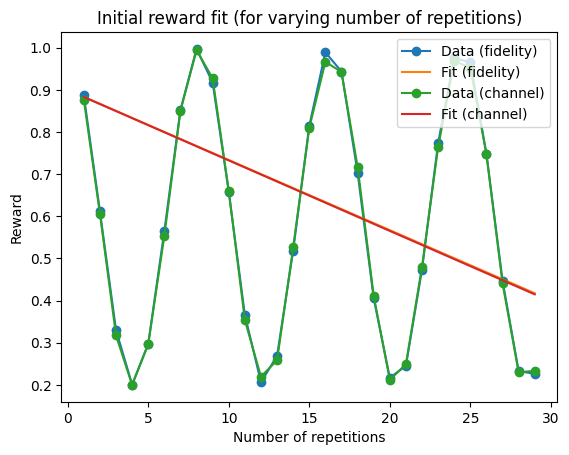

In [36]:
channel_env.initial_reward_fit(0.8*np.ones((1, 1)), reward_method=["fidelity", "channel"],
                          execution_config=ExecutionConfig(batch_size=1, n_reps= list(range(1, 30)),
                           dfe_precision=(0.001, 0.005), seed=seed, c_factor=1))


In [46]:
data_dfe[9].total_shots

1752